In [1]:
!gdown 1GmJQEtTC6WGk2bWYBXQlFddG5KVHrsWA

Downloading...
From (original): https://drive.google.com/uc?id=1GmJQEtTC6WGk2bWYBXQlFddG5KVHrsWA
From (redirected): https://drive.google.com/uc?id=1GmJQEtTC6WGk2bWYBXQlFddG5KVHrsWA&confirm=t&uuid=e240634f-0378-47d0-ae91-7203e9ff2237
To: /content/new_tempImage.zip
100% 10.4M/10.4M [00:00<00:00, 96.9MB/s]


In [2]:
!unzip "./new_tempImage.zip"

Archive:  ./new_tempImage.zip
   creating: tempImage/
   creating: tempImage/goImage/
  inflating: tempImage/goImage/_04179_090.png  
  inflating: tempImage/goImage/_01900_090.png  
  inflating: tempImage/goImage/_01618_090.png  
  inflating: tempImage/goImage/_01378_090.png  
  inflating: tempImage/goImage/_00364_090.png  
  inflating: tempImage/goImage/_02177_090.png  
  inflating: tempImage/goImage/_01861_090.png  
  inflating: tempImage/goImage/_03245_090.png  
  inflating: tempImage/goImage/_03445_090.png  
  inflating: tempImage/goImage/_01351_090.png  
  inflating: tempImage/goImage/_01278_090.png  
  inflating: tempImage/goImage/_02472_090.png  
  inflating: tempImage/goImage/_01087_090.png  
  inflating: tempImage/goImage/_00292_090.png  
  inflating: tempImage/goImage/_02133_090.png  
  inflating: tempImage/goImage/_01270_090.png  
  inflating: tempImage/goImage/_00708_090.png  
  inflating: tempImage/goImage/_01936_090.png  
  inflating: tempImage/goImage/_00686_090.png  
  

In [3]:
import os
import random
import fnmatch
import datetime
import pickle

# data processing
import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

# tensorflow
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# imaging
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

데이터 불러오기

image_path: /content/tempImage/goImage/_02977_090.png
steering_Angle: 90
image_path: /content/tempImage/goImage/_01357_090.png
steering_Angle: 90
image_path: /content/tempImage/goImage/_00084_090.png
steering_Angle: 90
image_path: /content/tempImage/goImage/_03485_090.png
steering_Angle: 90
image_path: /content/tempImage/goImage/_04066_090.png
steering_Angle: 90
2163
2163


,ImagePath,Angle
0,/content/tempImage/goImage/_02977_090.png,90
1,/content/tempImage/goImage/_02862_090.png,90
2,/content/tempImage/goImage/_01332_090.png,90
3,/content/tempImage/goImage/_03839_090.png,90
4,/content/tempImage/goImage/_01418_090.png,90
...,...,...
2158,/content/tempImage/rightImage/_02006_135.png,135
2159,/content/tempImage/rightImage/_03366_135.png,135
2160,/content/tempImage/rightImage/_00305_135.png,135
2161,/content/tempImage/rightImage/_00615_135.png,135


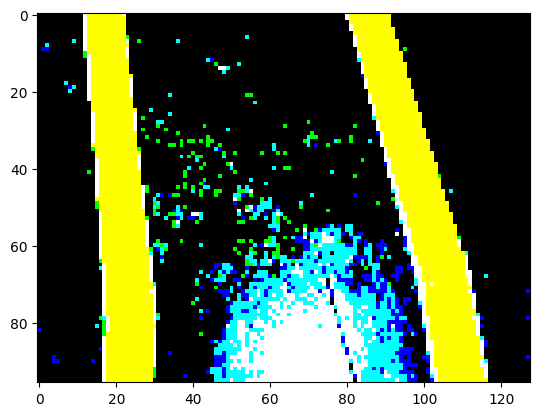

In [4]:
import random
list_rand = random.sample(range(0,3201), 1000)

go_dir = '/content/tempImage/goImage'
left_dir = '/content/tempImage/leftImage'
right_dir = '/content/tempImage/rightImage'

dir_list = [go_dir, left_dir, right_dir]
angle_lst = [90, 45, 135]


image_paths = []
steering_angles = []

for i  in range(3):
    file_list = os.listdir(dir_list[i])

    pattern = "*.png"
    count = 0

    if(i == 0):
        for j in list_rand:
            filename = file_list[j]
            if fnmatch.fnmatch(filename, pattern):
                image_paths.append(os.path.join(dir_list[i],filename))

                angle = int(angle_lst[i])
                steering_angles.append(angle)
    else :
        for filename in file_list:
            if fnmatch.fnmatch(filename, pattern):
                image_paths.append(os.path.join(dir_list[i],filename))

                angle = int(angle_lst[i])
                steering_angles.append(angle)

for i in range(5):
    image_index = i*200
    plt.imshow(Image.open(image_paths[image_index]))
    print("image_path: %s" % image_paths[image_index] )
    print("steering_Angle: %d" % steering_angles[image_index] )

df = pd.DataFrame()
df['ImagePath'] = image_paths
df['Angle'] = steering_angles

print(len(image_paths))
print(len(steering_angles))

df

데이터 분포 확인

(array([592.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1000.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        571.0000]),
 array([45.0000, 48.6000, 52.2000, 55.8000, 59.4000, 63.0000, 66.6000,
        70.2000, 73.8000, 77.4000, 81.0000, 84.6000, 88.2000, 91.8000,
        95.4000, 99.0000, 102.6000, 106.2000, 109.8000, 113.4000, 117.0000,
        120.6000, 124.2000, 127.8000, 131.4000, 135.0000]),
 <BarContainer object of 25 artists>)

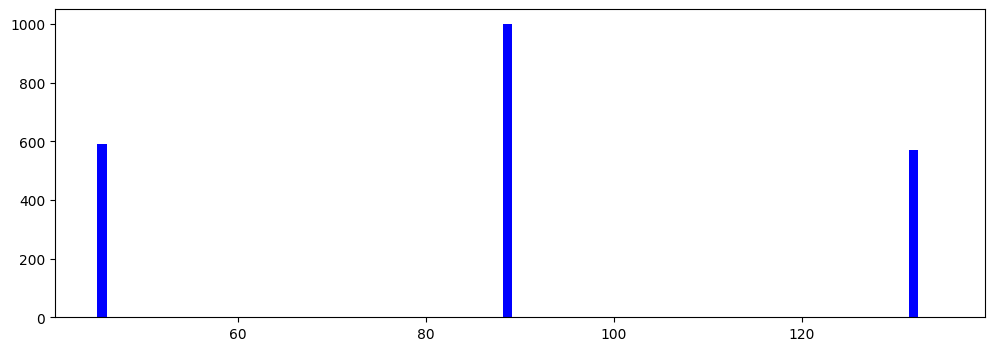

In [5]:
num_of_bins = 25
hist, bins = np.histogram(df['Angle'], num_of_bins)

fig, axes = plt.subplots(1,1, figsize=(12,4))
axes.hist(df['Angle'], bins=num_of_bins, width=1, color='blue')

train test 나누기 (test data 없음)

Training data: 1730
Validation data: 433


Text(0.5, 1.0, 'Validation Data')

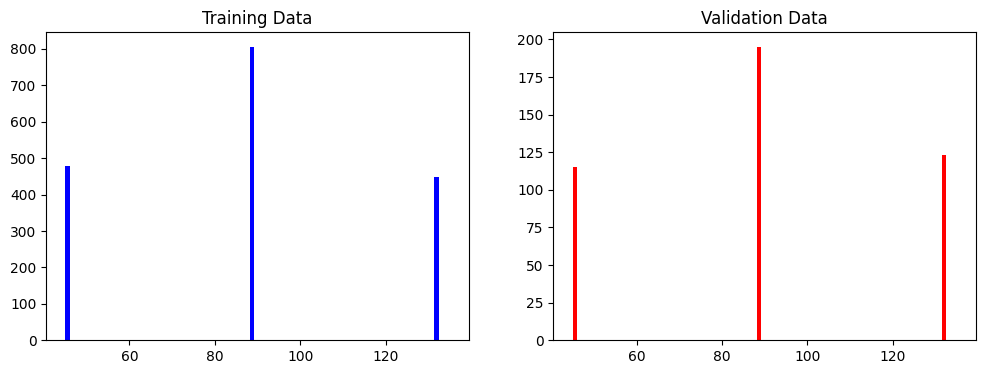

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split( image_paths, steering_angles, test_size=0.2)
print("Training data: %d\nValidation data: %d" % (len(X_train), len(X_valid)))

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

이미지 전처리

Text(0.5, 1.0, 'processed')

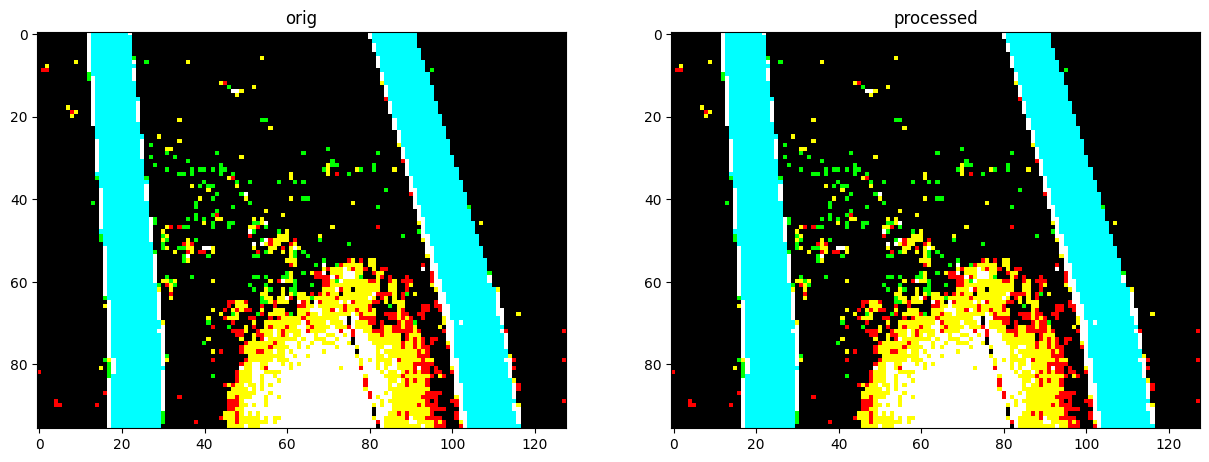

In [7]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def img_preprocess(image):
    image = image / 255
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(image_paths[image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

데이터의 배치를 만들어서 저장 / [yield](https://www.daleseo.com/python-yield/)

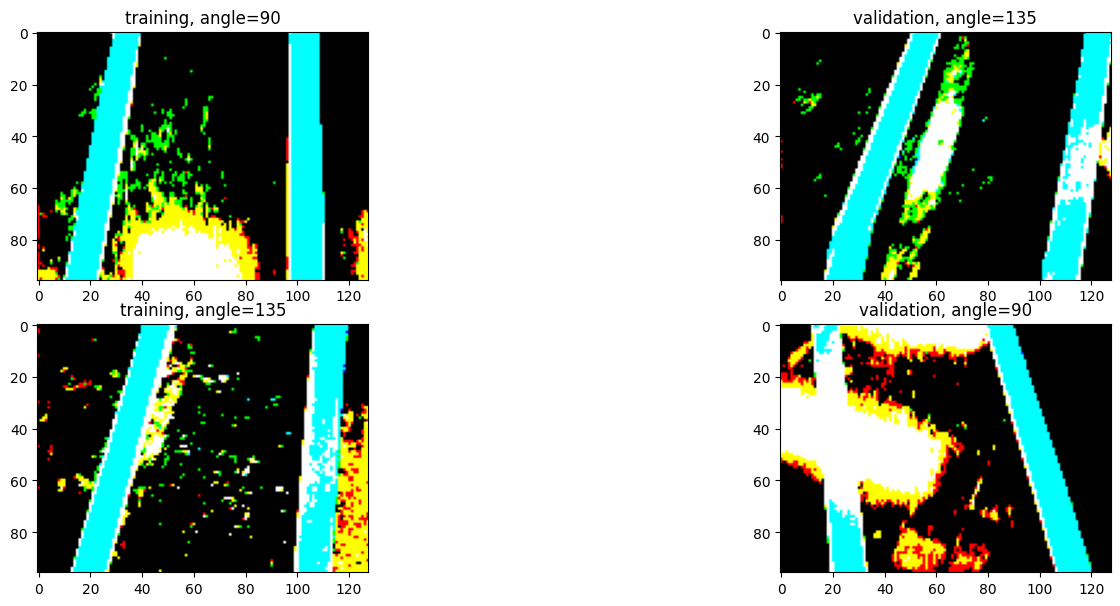

In [8]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]

            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)

        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6))
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" % y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" % y_valid_batch[i])

모델 구성

In [9]:
def nvidia_model():
    model = tf.keras.Sequential()

    model.add(Conv2D(24, (5, 5), input_shape=(96, 128, 3), activation='elu', padding="same"))
    model.add(Conv2D(36, (5, 5), activation='elu', padding="same"))
    #model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu', padding="same"))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='elu', padding="same"))

    model.add(Flatten())
    model.add(Dropout(0.2))
    #model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))

    model.add(Dense(1))

    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model

model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 128, 24)       1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 128, 36)       21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 64)       20800     
                                                                 
 dropout (Dropout)           (None, 96, 128, 64)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 128, 64)       36928     
                                                                 
 flatten (Flatten)           (None, 786432)            0         
                                                                 
 dropout_1 (Dropout)         (None, 786432)            0

학습

In [10]:
model_output_dir = '/content/tempImage/model'

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lane_navigation_check.keras'), verbose=1, save_best_only=True)

history = model.fit(image_data_generator( X_train, y_train, batch_size=32),
                    steps_per_epoch=300,
                    epochs=20,
                    validation_data = image_data_generator( X_valid, y_valid, batch_size=32),
                    validation_steps=200,
                    verbose=1,
                    shuffle=1,
                    callbacks=[checkpoint_callback])

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 775.4723
Epoch 1: val_loss improved from inf to 552.26849, saving model to /content/tempImage/model/lane_navigation_check.keras
300/300 [==============================] - 51s 134ms/step - loss: 775.4723 - val_loss: 552.2685
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 149.8683
Epoch 2: val_loss did not improve from 552.26849
300/300 [==============================] - 36s 119ms/step - loss: 149.8683 - val_loss: 561.0073
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 25.6921
Epoch 3: val_loss did not improve from 552.26849
300/300 [==============================] - 37s 123ms/step - loss: 25.6921 - val_loss: 598.3433
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 13.2390
Epoch 4: val_loss did not improve from 552.26849
300/300 [==============================] - 37s 125ms/step - loss: 13.2390 - val_loss: 579.1849
Epoch 5/20
300/300 [==================

## **모델 저장하기**

h5랑 tflite로 저장

In [11]:
# type1 : .h5 형식으로 모델 저장
# 모델 저장
model.save('model.h5')

# 모델 로드
loaded_model = tf.keras.models.load_model('model.h5')

# TFLite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# TFLite 모델 저장
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


keras를 tflite로 변환해 저장

In [12]:
# type2 : .keras 형식으로 모델 저장

import tensorflow as tf
import os

# 모델 디렉토리와 체크포인트 파일 경로 설정
model_output_dir = '/content/tempImage/model'
checkpoint_filepath = os.path.join(model_output_dir, 'line_navigation_check.keras')

# 1. 모델 로드
try:
    model = tf.keras.models.load_model(checkpoint_filepath)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# 2. TensorFlow Lite 변환기 생성
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    print("TFLiteConverter created successfully.")
except Exception as e:
    print(f"Error creating TFLiteConverter: {e}")

# 3. 변환 옵션 설정
try:
    converter.optimizations = [tf.lite.Optimize.DEFAULT]  # 모델 최적화 옵션
    # converter.target_spec.supported_types = [tf.float16]  # 예: float16 지원 타입으로 변환
    print("TFLiteConverter optimizations set successfully.")
except Exception as e:
    print(f"Error setting optimizations: {e}")

# 4. 모델 변환
try:
    tflite_model = converter.convert()
    print("Model converted to TFLite format successfully.")
except Exception as e:
    print(f"Error converting model: {e}")

# 5. 변환된 모델 저장 경로 설정
tflite_model_path = os.path.join(model_output_dir, 'line_navigation_check.tflite')

# 6. 변환된 모델 저장
try:
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    print(f"TFLite 모델이 {tflite_model_path}에 저장되었습니다.")
except Exception as e:
    print(f"Error saving TFLite model: {e}")


Error loading model: No file or directory found at /content/tempImage/model/line_navigation_check.keras
TFLiteConverter created successfully.
TFLiteConverter optimizations set successfully.
Model converted to TFLite format successfully.
TFLite 모델이 /content/tempImage/model/line_navigation_check.tflite에 저장되었습니다.


tflite로 변환